In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('C:\\Users\\STUDENT\\Desktop\\ML_kurs2022-main\\ML_kurs2022-main\\Classic_models\\insurance.csv')

In [39]:
data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [40]:
for col in data.columns:
    print(f'{col} {data[col].unique()}')

age [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex ['female' 'male']
bmi [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34

In [41]:
data.replace({'female':0, 'male':1}, inplace=True)

In [42]:
data.replace({'no':0, 'yes':1}, inplace=True)

In [43]:
data['southwest']=data['region']=='southwest'
data['southeast']=data['region']=='southeast'
data['northwest']=data['region']=='northwest'
data['northeast']=data['region']=='northeast'


In [44]:
data.replace({True:1, False:0},inplace=True)
data

age  sex     bmi  children  smoker     region      charges  southwest  \
0      19    0  27.900         0       1  southwest  16884.92400          1   
1      18    1  33.770         1       0  southeast   1725.55230          0   
2      28    1  33.000         3       0  southeast   4449.46200          0   
3      33    1  22.705         0       0  northwest  21984.47061          0   
4      32    1  28.880         0       0  northwest   3866.85520          0   
...   ...  ...     ...       ...     ...        ...          ...        ...   
1333   50    1  30.970         3       0  northwest  10600.54830          0   
1334   18    0  31.920         0       0  northeast   2205.98080          0   
1335   18    0  36.850         0       0  southeast   1629.83350          0   
1336   21    0  25.800         0       0  southwest   2007.94500          1   
1337   61    0  29.070         0       1  northwest  29141.36030          0   

      southeast  northwest  northeast  
0             0          0          0  
1             1          0          0  
2             1          0          0  
3             0          1          0  
4             0          1          0  
...         ...        ...        ...  
1333          0          1          0  
1334          0          0          1  
1335          1          0          0  
1336          0          0          0  
1337          0          1          0  

[1338 rows x 11 columns]

In [45]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'southwest', 'southeast', 'northwest', 'northeast'],
      dtype='object')

In [46]:
data= data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 
       'southwest', 'southeast', 'northwest', 'northeast','charges']]
data

age  sex     bmi  children  smoker     region  southwest  southeast  \
0      19    0  27.900         0       1  southwest          1          0   
1      18    1  33.770         1       0  southeast          0          1   
2      28    1  33.000         3       0  southeast          0          1   
3      33    1  22.705         0       0  northwest          0          0   
4      32    1  28.880         0       0  northwest          0          0   
...   ...  ...     ...       ...     ...        ...        ...        ...   
1333   50    1  30.970         3       0  northwest          0          0   
1334   18    0  31.920         0       0  northeast          0          0   
1335   18    0  36.850         0       0  southeast          0          1   
1336   21    0  25.800         0       0  southwest          1          0   
1337   61    0  29.070         0       1  northwest          0          0   

      northwest  northeast      charges  
0             0          0  16884.92400  
1             0          0   1725.55230  
2             0          0   4449.46200  
3             1          0  21984.47061  
4             1          0   3866.85520  
...         ...        ...          ...  
1333          1          0  10600.54830  
1334          0          1   2205.98080  
1335          0          0   1629.83350  
1336          0          0   2007.94500  
1337          1          0  29141.36030  

[1338 rows x 11 columns]

<AxesSubplot:>

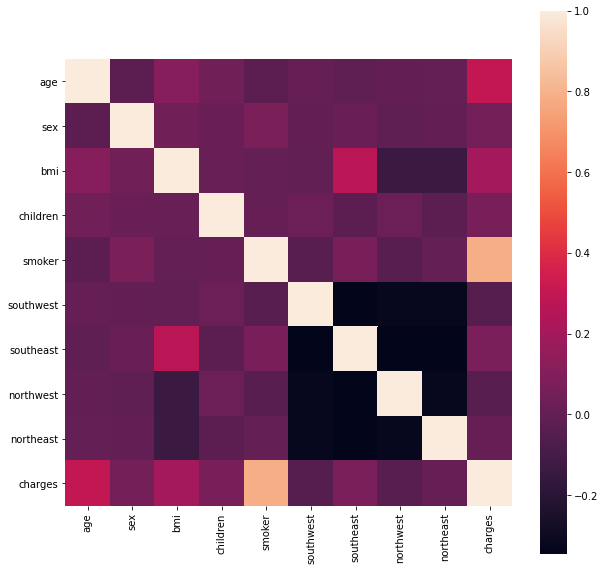

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), square=True)

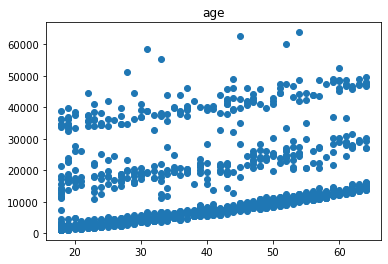

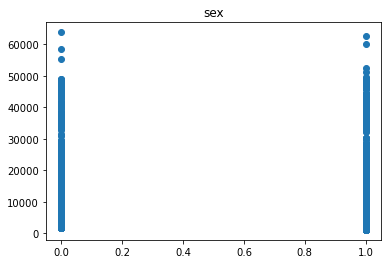

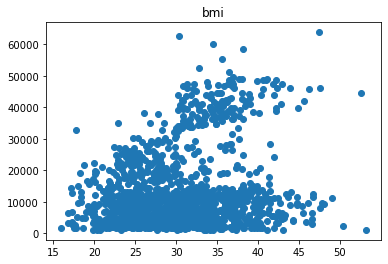

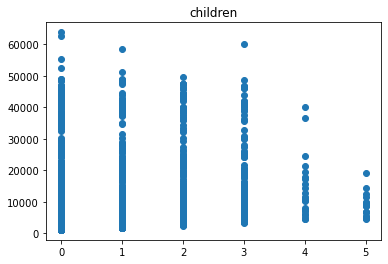

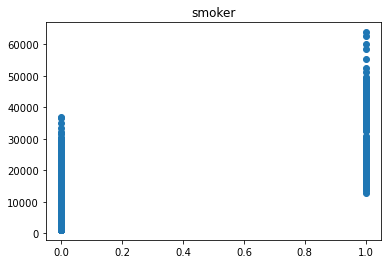

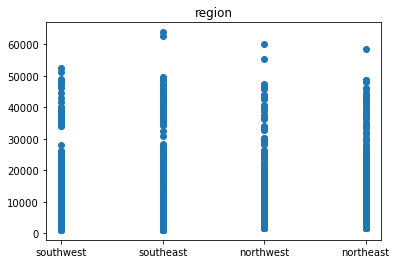

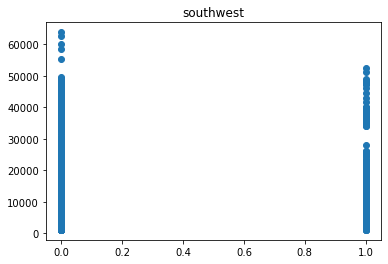

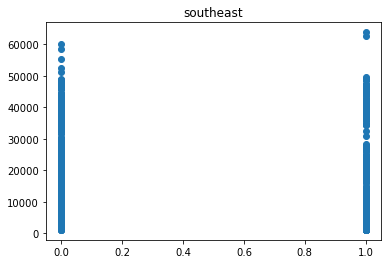

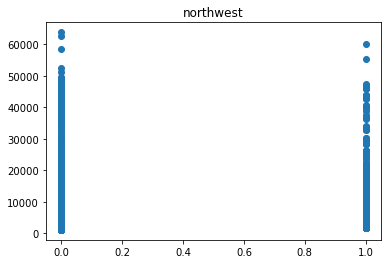

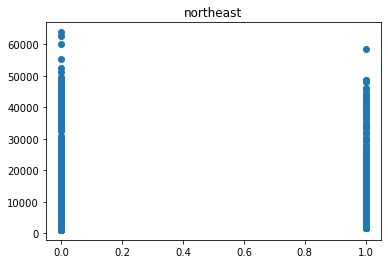

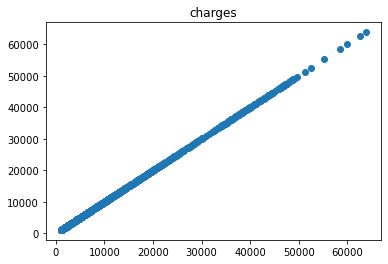

In [48]:
for col in data.columns:
    plt.figure
    plt.scatter(data[col], data['charges'])
    plt.title(col)
    plt.show()

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(data[['age', 'sex', 'bmi', 'children', 'smoker', 
       'southwest', 'southeast', 'northwest', 'northeast']], data['charges'], test_size=0.33, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
X_train

age  sex     bmi  children  smoker  southwest  southeast  northwest  \
1046   43    0  25.080         0       0          0          0          0   
682    39    1  35.300         2       1          1          0          0   
1037   45    0  30.495         1       1          0          0          1   
490    19    0  32.900         0       0          1          0          0   
39     60    1  39.900         0       1          1          0          0   
...   ...  ...     ...       ...     ...        ...        ...        ...   
1095   18    0  31.350         4       0          0          0          0   
1130   39    0  23.870         5       0          0          1          0   
1294   58    1  25.175         0       0          0          0          0   
860    37    0  47.600         2       1          1          0          0   
1126   55    1  29.900         0       0          1          0          0   

      northeast  
1046          1  
682           0  
1037          0  
490           0  
39            0  
...         ...  
1095          1  
1130          0  
1294          1  
860           0  
1126          0  

[896 rows x 9 columns]

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
reg = LinearRegression().fit(X_train,y_train)


In [60]:
y_pred=reg.predict(X_test)

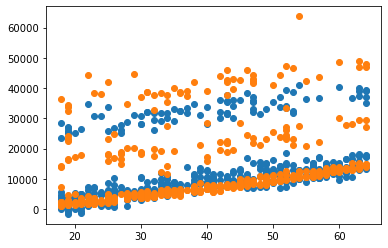

In [61]:
plt.figure()
plt.scatter(X_test['age'], y_pred)
plt.scatter(X_test['age'], y_test)
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [63]:
mape(y_pred,y_test)

0.7979634762652362